2nd Phase Report
- Ilia Poliak - 60%
- Andrii Dokaniev - 40%

# Predspracovanie údajov

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
dataset_path = r"..\data"

In [4]:
observation_file_name = "observation.csv"

In [5]:
observation = pd.read_csv(dataset_path + '/' + observation_file_name, sep='\t')

## Realizácia predspracovania dát (5b).

**(A-1b) Dáta si rozdeľte na trénovaciu a testovaciu množinu podľa vami preddefinovaného pomeru. Ďalej pracujte len s trénovacím datasetom.**

In [6]:
target_col = 'oximetry'

# Split
x = observation.drop(columns=[target_col])
y = observation[target_col]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123, stratify=y
)

print(x_train.shape, x_test.shape)

(9670, 22) (2418, 22)


**(B-1b) Transformujte dáta na vhodný formát pre strojové učenie t.j. jedno pozorovanie musí byť opísané jedným riadkom a každý atribút musí byť v numerickom formáte. Iteratívne integrujte aj kroky v predspracovaní dát z prvej fázy ako celok.**

In [7]:
# Identify numeric and categorical features
numeric_features = x_train.select_dtypes(include=np.number).columns
categorical_features = x_train.select_dtypes(exclude=np.number).columns

print("Numeric features:", list(numeric_features))
print("Categorical features:", list(categorical_features))

Numeric features: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'latitude', 'longitude']
Categorical features: []


All the values are already suitable for machine learning

**(C-1b) Transformujte atribúty dát pre strojové učenie podľa dostupných techník minimálne: scaling (2 techniky), transformers (2 techniky) a ďalšie. Cieľom je aby ste testovali efekty a vhodne kombinovali v dátovom pipeline (od časti 2.3 a v 3. fáze).**

In [8]:
# normalize to [0,1]
pipeline_scaler_minmax = Pipeline(steps=[
    ('scaler_minmax', MinMaxScaler()), 
])

# center around 0
pipeline_scaler_standard = Pipeline(steps=[
    ('scaler_standard', StandardScaler()), 
])

# normalize skew
pipeline_transformer_power = Pipeline(steps=[
    ('transformer_power', PowerTransformer()), 
])

# creates new features by taking combinations of existing features
pipeline_transformer_poly = Pipeline(steps=[
    ('transformer_poly', PolynomialFeatures(degree=2, include_bias=False)) 
])

In [9]:
preprocessor_scaler_minmax = ColumnTransformer(
    transformers=[
        ('scaler_minmax', pipeline_scaler_minmax, x_train.columns)
    ]
)

preprocessor_scaler_standard = ColumnTransformer(
    transformers=[
        ('scaler_standard', pipeline_scaler_standard, x_train.columns)
    ]
)

preprocessor_transformer_power = ColumnTransformer(
    transformers=[
        ('transformer_power', pipeline_transformer_power, x_train.columns)
    ]
)

preprocessor_transformer_poly = ColumnTransformer(
    transformers=[
        ('transformer_poly', pipeline_transformer_poly, x_train.columns)
    ]
)


In [10]:
x_train_minmax = pd.DataFrame(preprocessor_scaler_minmax.fit_transform(x_train), columns=x_train.columns)
x_train_standard = pd.DataFrame(preprocessor_scaler_standard.fit_transform(x_train), columns=x_train.columns)
x_train_power = pd.DataFrame(preprocessor_transformer_power.fit_transform(x_train), columns=x_train.columns)
x_train_poly = pd.DataFrame(preprocessor_transformer_poly.fit_transform(x_train))

In [11]:
x_train.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,SV,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,latitude,longitude
count,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,...,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000
mean,97.789491,80.686004,10.333332,16.335224,39.530716,58.855218,110.697225,104.600484,35.859158,9.015969,...,88.588422,4.168651,52.572274,48.962449,50.026966,51.680438,0.249438,29.960419,29.494237,6.911722
std,0.949002,5.135296,2.810658,0.971999,1.204178,14.810273,23.684353,4.107449,0.542221,1.004002,...,3.123221,0.194810,11.581068,13.691778,13.552842,13.672712,0.028875,5.768523,22.386854,72.038061
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,5.644956,...,60.000000,4.004240,5.592279,0.000000,0.927116,0.000000,0.200000,20.001345,-54.800000,-122.867050
25%,97.028212,77.274865,8.244465,15.683630,38.722207,47.195253,95.587685,101.847626,35.501979,8.337900,...,86.506705,4.062552,44.764378,39.555127,41.054346,42.327746,0.224555,24.941236,15.794080,-68.304720
50%,97.943148,80.698165,10.467167,16.331898,39.523248,56.612011,110.328140,104.613928,35.858256,9.002749,...,88.595042,4.109765,52.636549,48.860899,50.064709,51.567587,0.248909,30.023377,35.882640,8.738120
75%,98.541378,84.121710,12.451796,16.978679,40.338886,71.193026,125.510249,107.352627,36.211671,9.700194,...,90.681461,4.199070,60.338040,58.359764,59.192622,60.829478,0.274691,34.928568,45.539290,57.355200
max,99.960499,99.286422,20.000000,19.943296,45.000000,100.000000,200.000000,120.000000,37.882019,12.835262,...,100.000000,7.487159,94.980276,100.000000,100.000000,100.000000,0.300000,40.000000,61.784910,171.253640


In [12]:
x_train_minmax.describe() # normalize to [0,1]

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,SV,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,latitude,longitude
count,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,...,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000
mean,0.562341,0.526543,0.511784,0.545771,0.453072,0.479180,0.503873,0.486683,0.585651,0.468828,...,0.714711,0.047205,0.525574,0.489624,0.495593,0.516804,0.494379,0.497987,0.723029,0.441243
std,0.191312,0.130714,0.141952,0.122367,0.120418,0.187472,0.131580,0.136915,0.111065,0.139633,...,0.078081,0.055933,0.129560,0.136918,0.136797,0.136727,0.288755,0.288446,0.192022,0.244927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.408873,0.439716,0.406286,0.463741,0.372221,0.331585,0.419932,0.394921,0.512489,0.374524,...,0.662668,0.016742,0.438225,0.395551,0.405027,0.423277,0.245546,0.247011,0.605516,0.185510
50%,0.593317,0.526853,0.518544,0.545353,0.452325,0.450785,0.501823,0.487131,0.585466,0.466989,...,0.714876,0.030298,0.526293,0.488609,0.495974,0.515676,0.489088,0.501135,0.777825,0.447453
75%,0.713916,0.613996,0.618778,0.626778,0.533889,0.635355,0.586168,0.578421,0.657857,0.563987,...,0.767037,0.055939,0.612451,0.583598,0.588107,0.608295,0.746908,0.746411,0.860654,0.612749
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
x_train_standard.describe() # center around 0

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,SV,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,latitude,longitude
count,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,...,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03
mean,4.463671e-15,-7.943089e-16,1.087490e-16,1.357159e-15,-4.331959e-15,8.229657e-17,-6.370637e-16,-8.479486e-16,7.829196e-16,8.890969e-16,...,7.583041e-16,1.745863e-15,-3.005295e-16,-2.204372e-17,4.206678e-16,-2.171307e-16,-3.637215e-16,-7.987176e-16,-6.098764e-17,-2.020675e-17
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,...,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.939547e+00,-4.028409e+00,-3.605510e+00,-4.460341e+00,-3.762691e+00,-2.556143e+00,-3.829613e+00,-3.554820e+00,-5.273326e+00,-3.357750e+00,...,-9.153979e+00,-8.439992e-01,-4.056830e+00,-3.576232e+00,-3.623033e+00,-3.780019e+00,-1.712193e+00,-1.726541e+00,-3.765540e+00,-1.801624e+00
25%,-8.022309e-01,-6.642879e-01,-7.432335e-01,-6.703992e-01,-6.714539e-01,-7.873297e-01,-6.379875e-01,-6.702458e-01,-6.587687e-01,-6.754016e-01,...,-6.665634e-01,-5.446574e-01,-6.742297e-01,-6.871138e-01,-6.620813e-01,-6.840761e-01,-8.617880e-01,-8.701435e-01,-6.120050e-01,-1.044175e+00
50%,1.619231e-01,2.368184e-03,4.761951e-02,-3.421957e-03,-6.201903e-03,-1.514707e-01,-1.558431e-02,3.273197e-03,-1.663723e-03,-1.316832e-02,...,2.119632e-03,-3.022882e-01,5.550230e-03,-7.417279e-03,2.784974e-03,-8.254201e-03,-1.832564e-02,1.091472e-02,2.853788e-01,2.535454e-02
75%,7.923332e-01,6.690722e-01,7.537645e-01,6.620257e-01,6.711728e-01,8.331006e-01,6.254674e-01,6.700717e-01,6.501609e-01,6.815319e-01,...,6.701886e-01,1.561534e-01,6.705916e-01,6.863828e-01,6.763253e-01,6.691805e-01,8.745903e-01,8.612961e-01,7.167547e-01,7.002699e-01
max,2.287793e+00,3.622260e+00,3.439468e+00,3.712203e+00,4.542158e+00,2.778268e+00,3.770734e+00,3.749362e+00,3.730890e+00,3.804265e+00,...,3.653974e+00,1.703544e+01,3.662028e+00,3.727799e+00,3.687464e+00,3.534197e+00,1.751128e+00,1.740498e+00,1.442469e+00,2.281439e+00


In [14]:
x_train_power.describe() # normalize skew

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,SV,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,latitude,longitude
count,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,...,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03,9.670000e+03
mean,6.833555e-17,-3.784173e-15,-3.291863e-16,-2.240377e-15,1.061773e-15,2.039045e-16,2.285199e-16,8.398659e-16,-3.190462e-15,-8.971796e-16,...,-1.800238e-16,1.338267e-18,-1.851673e-16,-4.577747e-16,-9.864567e-17,-4.842272e-16,2.939163e-18,-1.731167e-15,-7.862262e-17,1.653279e-17
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,...,1.000052e+00,2.557355e-16,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.419474e+00,-3.956233e+00,-3.282411e+00,-4.481201e+00,-3.799346e+00,-3.101554e+00,-3.990422e+00,-3.523099e+00,-5.309981e+00,-3.384742e+00,...,-7.723579e+00,-4.302114e-16,-4.092937e+00,-3.778973e+00,-3.513100e+00,-3.814808e+00,-1.731573e+00,-1.774858e+00,-2.462479e+00,-1.728329e+00
25%,-8.475107e-01,-6.669801e-01,-7.562024e-01,-6.698110e-01,-6.699583e-01,-7.610107e-01,-6.324854e-01,-6.717771e-01,-6.580112e-01,-6.739974e-01,...,-6.774950e-01,-2.012279e-16,-6.732058e-01,-6.807734e-01,-6.662817e-01,-6.830473e-01,-8.593094e-01,-8.626658e-01,-8.263501e-01,-1.031998e+00
50%,7.970189e-02,-2.080154e-03,2.870142e-02,-2.409220e-03,-3.532593e-03,-8.873039e-02,-7.767154e-03,6.298221e-04,-3.374502e-04,-1.082015e-02,...,-1.535690e-02,-5.551115e-17,7.045154e-03,1.671725e-03,-2.717047e-03,-6.804438e-03,-8.596853e-03,3.334499e-02,2.221574e-01,-1.828473e-02
75%,7.756457e-01,6.668150e-01,7.492224e-01,6.625652e-01,6.726103e-01,8.509016e-01,6.294718e-01,6.686885e-01,6.509198e-01,6.826676e-01,...,6.617839e-01,1.595946e-16,6.712380e-01,6.899242e-01,6.742762e-01,6.697672e-01,8.769053e-01,8.653775e-01,7.675479e-01,6.905558e-01
max,2.762616e+00,3.673859e+00,3.622742e+00,3.699992e+00,4.492241e+00,2.459293e+00,3.686849e+00,3.782858e+00,3.714093e+00,3.775768e+00,...,3.876571e+00,6.938894e-16,3.646537e+00,3.636183e+00,3.744530e+00,3.520588e+00,1.731615e+00,1.697545e+00,1.728498e+00,2.386963e+00


In [15]:
x_train_poly.describe() # creates new features by taking combinations of existing features

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
count,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,...,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000
mean,97.789491,80.686004,10.333332,16.335224,39.530716,58.855218,110.697225,104.600484,35.859158,9.015969,...,0.063053,7.472842,7.348647,1.731441,930.899106,883.141985,203.717110,1371.029466,122.708766,5236.717415
std,0.949002,5.135296,2.810658,0.971999,1.204178,14.810273,23.684353,4.107449,0.542221,1.004002,...,0.014443,1.686339,5.674908,18.111674,346.784094,704.857643,2195.441322,971.049427,2366.030084,5618.381991
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,5.644956,...,0.040000,4.049594,-16.293594,-36.857857,400.053808,-2133.740338,-4811.439019,0.001454,-7603.099904,0.033610
25%,97.028212,77.274865,8.244465,15.683630,38.722207,47.195253,95.587685,101.847626,35.501979,8.337900,...,0.050425,6.159380,3.986662,-15.519265,622.065260,471.783838,-1731.474706,466.552656,-701.872093,187.355321
50%,97.943148,80.698165,10.467167,16.331898,39.523248,56.612011,110.328140,104.613928,35.858256,9.002749,...,0.061956,7.372433,8.852004,2.115680,901.403186,1017.963168,251.908149,1306.582662,359.431899,4347.093238
75%,98.541378,84.121710,12.451796,16.978679,40.338886,71.193026,125.510249,107.352627,36.211671,9.700194,...,0.075455,8.651578,11.328296,14.394308,1220.004870,1362.340314,1654.338533,2091.537473,1485.046674,8039.136165
max,99.960499,99.286422,20.000000,19.943296,45.000000,100.000000,200.000000,120.000000,37.882019,12.835262,...,0.090000,11.958515,18.308203,50.122109,1600.000000,2412.645176,6192.520434,3817.375104,7478.937861,29327.809213


**(D-2b) Zdôvodnite Vaše voľby/rozhodnutie pre realizáciu (t.j. zdokumentovanie)**

- We chose oximetry as a target column (this makes it a binary classification problem)
- We split the dataset into training and testing part (80%/20%) 
- All the data were numeric so no need to transform it
- We tried several attribute transformation techniques and printed the results
    - Later we will use them to compare their effect on our model 

## Výber atribútov pre strojové učenie (5b)

**(A-3b) Zistite, ktoré atribúty (features) vo vašich dátach pre ML sú informatívne k predikovanej premennej (minimálne 3 techniky s porovnaním medzi sebou).**

In [16]:
# ANOVA F-test (for linear dependency)
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(x_train_minmax, y_train)
anova_scores = pd.Series(anova_selector.scores_, index=x_train_minmax.columns)

In [17]:
# Mutual Information (captures non-linear dependency)
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(x_train_minmax, y_train)
mi_scores = pd.Series(mi_selector.scores_, index=x_train_minmax.columns)

In [18]:
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(x_train_minmax, y_train)
rf_scores = pd.Series(rf.feature_importances_, index=x_train_minmax.columns)


**(B-1b) Zoraďte zistené atribúty v poradí podľa dôležitosti.**

In [19]:
# Combine results for comparison
importance_df = pd.DataFrame({
    'ANOVA_F': anova_scores,
    'Mutual_Info': mi_scores,
    'RandomForest': rf_scores
})

# Compute mean score to get overall ranking
importance_df['Mean_Score'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values('Mean_Score', ascending=False)

print(importance_df.head(10))  # top 10 most informative features


                      ANOVA_F  Mutual_Info  RandomForest   Mean_Score
Hb level          7419.686875     0.271011      0.346700  2473.434862
SpO₂              1491.320291     0.125884      0.146971   497.197716
PI                 874.450379     0.065667      0.093830   291.536625
PRV                128.145107     0.011706      0.045877    42.734230
FiO₂                59.877240     0.055237      0.078944    20.003807
Skin Temperature    15.378984     0.006662      0.033913     5.139853
PVI                  3.381345     0.000655      0.016633     1.132878
longitude            2.882448     0.000000      0.015489     0.965979
Blood Flow Index     1.695404     0.005081      0.015943     0.572143
CO                   1.391268     0.005954      0.014696     0.470639


**(C-1b) Zdôvodnite Vaše voľby/rozhodnutie pre realizáciu (t.j. zdokumentovanie)**

- ANOVA F-test identifies features with strong linear correlation with the target.

- Mutual Information detects both linear and non-linear relationships, capturing complex dependencies.

- Random Forest Importance evaluates how features contribute to reducing classification error, including interactions between features.

- Comparing all three methods provides a robust selection of informative features for later modeling.

- Using Mean_Score allows combining different metrics into a single feature ranking, which can guide dimensionality reduction or model selection.

## Replikovateľnosť predspracovania (5b).

**(A-3b) Upravte váš kód realizujúci predspracovanie trénovacej množiny tak, aby ho bolo 
možné bez ďalších úprav znovu použiť na predspracovanie testovacej množiny v 
kontexte strojového učenia.**

In [20]:
top_features = list(importance_df.head(10).index)
x_train_top = x_train[top_features]
x_test_top = x_test[top_features]

In the output below we see the top 10 attributes:

In [21]:
top_features

['Hb level',
 'SpO₂',
 'PI',
 'PRV',
 'FiO₂',
 'Skin Temperature',
 'PVI',
 'longitude',
 'Blood Flow Index',
 'CO']

In [22]:
x_train_top.describe()

,Hb level,SpO₂,PI,PRV,FiO₂,Skin Temperature,PVI,longitude,Blood Flow Index,CO
count,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000
mean,15.216841,97.789491,10.333332,110.697225,58.855218,35.859158,14.850216,6.911722,52.572274,4.168651
std,1.041385,0.949002,2.810658,23.684353,14.810273,0.542221,1.242333,72.038061,11.581068,0.194810
min,12.014509,95.000000,0.200000,20.000000,21.000000,33.000000,10.495995,-122.867050,5.592279,4.004240
25%,14.406457,97.028212,8.244465,95.587685,47.195253,35.501979,13.999932,-68.304720,44.764378,4.062552
50%,15.250918,97.943148,10.467167,110.328140,56.612011,35.858256,14.851887,8.738120,52.636549,4.109765
75%,16.070489,98.541378,12.451796,125.510249,71.193026,36.211671,15.696007,57.355200,60.338040,4.199070
max,18.000000,99.960499,20.000000,200.000000,100.000000,37.882019,20.000000,171.253640,94.980276,7.487159


In [23]:
x_test_top.describe()

,Hb level,SpO₂,PI,PRV,FiO₂,Skin Temperature,PVI,longitude,Blood Flow Index,CO
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,15.198497,97.787756,10.305676,110.387791,58.679100,35.865541,14.861835,8.146961,52.430237,4.173783
std,1.046861,0.954834,2.787054,23.937244,14.854543,0.542507,1.236028,71.707338,11.385873,0.232799
min,12.000000,95.068816,0.941232,22.530095,21.420095,33.958376,10.000000,-122.867050,0.000000,4.000000
25%,14.387426,97.035597,8.148856,95.935130,46.907256,35.499483,14.055286,-65.614270,44.982224,4.060967
50%,15.207691,97.939402,10.461941,110.232261,56.303274,35.865578,14.846371,8.618390,52.176452,4.107395
75%,16.050998,98.541240,12.427362,125.464753,71.213584,36.226376,15.692467,65.932490,59.910238,4.200590
max,17.696442,100.000000,18.576597,196.472975,96.300016,38.000000,18.841418,171.253640,100.000000,8.000000


In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            'scaling', 
            Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('power', PowerTransformer())
            ]),
            top_features
        )
    ]
)

**(B-2b) Využite možnosti sklearn.pipeline**

In [25]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=123))
])

Training the pipeline

In [26]:
pipeline.fit(x_train_top, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['Hb level', 'SpO₂', 'PI',
                                                   'PRV', 'FiO₂',
                                                   'Skin Temperature', 'PVI',
                                                   'longitude',
                                                   'Blood Flow Index',
                                                   'CO'])])),
                ('model', RandomForestClassifier(random_state=123))])

In [27]:
y_pred = pipeline.predict(x_test_top)
y_pred

array([1., 1., 1., ..., 1., 0., 0.])

Calculate prediction accuracy:

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (average='macro'):", precision_score(y_test, y_pred, average='macro'))
print("Recall (average='macro'):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (average='macro'):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9222497932175352
Precision (average='macro'): 0.918247404168119
Recall (average='macro'): 0.9213235184582218
F1-score (average='macro'): 0.9196862246250066


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       981
         1.0       0.94      0.93      0.93      1437

    accuracy                           0.92      2418
   macro avg       0.92      0.92      0.92      2418
weighted avg       0.92      0.92      0.92      2418



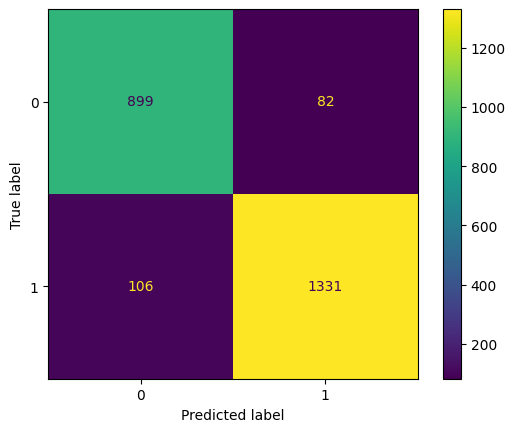

In [30]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()

As part of task 2.3, we modified the code so that it can be reused without further adjustments for preprocessing the test dataset in the context of machine learning.  
Using the **sklearn.pipeline** tool, we ensured the reproducibility of the entire process, which means that the same transformations are applied to both the test and training datasets.  
Proper data preprocessing should facilitate the subsequent training of models.